# <font color="red">Step 1: Understanding Problem Statement.</font>

- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.A US bike-sharing provider `BoomBikes` has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.The company is finding it very difficult to sustain in the current market scenario.
- So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.
- They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
-  they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
    1. Which variables are significant in predicting the demand for shared bikes.
    2. How well those variables describe the bike demands
    
**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Which model to be used and why?

- It is a regression problem where management want to understand how exactly the demands or total cnt of shared bikes vary with different features.
- which features effect demands of shared bikes.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# <font color="red">Step 2 :Reading and Understanding Data</font>

### <font color="blue">1) Importing required Library</font>

In [1]:
#Important library
import numpy as np,pandas as pd,seaborn as sns,matplotlib.pyplot as plt,warnings,statsmodels,statsmodels.api as sm
#For Spliting Data
from sklearn.model_selection import train_test_split
#For checking multicollinerity
from statsmodels.stats.outliers_influence  import variance_inflation_factor
#For Scalling
from sklearn.preprocessing import MinMaxScaler
#For Assement and Comparision
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
warnings.filterwarnings("ignore")

### <font color="blue">2) Importing Bike Rental Datatset</font>

In [2]:
# Loading bike sharing survey dataset
df=pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### <font color="blue">3) Size and Shape.</font>

In [3]:
df.shape

(730, 16)

### <font color="blue">4) Checking DataType and Description</font>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# <font color="red">Step 3: EDA(with visualization)</font>

### <font color="blue">1) Checking Null Values in data.</font>

In [6]:
# checking Null values in datasets
pd.DataFrame({"In count":df.isnull().sum().values,"In %":df.isnull().sum()/df.shape[1]})
#No null value Observed in data

,In count,In %
instant,0,0.0
dteday,0,0.0
season,0,0.0
yr,0,0.0
mnth,0,0.0
holiday,0,0.0
weekday,0,0.0
workingday,0,0.0
weathersit,0,0.0
temp,0,0.0


### <font color="blue">2) Removing Unwanted colums.</font>

In [7]:
# we dropping unuseful int col 'instant' and object col 'dteday' beacause for dteday are already classified in 
# dataset on col 'month','yr','workingday'
df.drop(["instant","dteday"],axis=1,inplace=True)
list(df.columns)

# Here causual and registered having sum os cnt so we don't need it so we removing while modeling.

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

### <font color='blue'>3)Renaming Columns.</font>

In [8]:
#Renaming col for better understanding.
df=df.rename(columns={"yr":"year","mnth":"month","atemp":"predTemp","hum":"humidity"})
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,predTemp,humidity,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### <font color='blue'>3) Converting Numerical col to Categorical col.</font>

In [9]:
#Before viualization changing numetrical to categorical col
# For Season variable
df.season=df.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
# For Weathersit variable
df.weathersit=df.weathersit.map({1:"ClearW",2:"MistW",3:"LightSnowW",4:"Heavy Rain"})
# For Month Variable
df.month=df.month.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
# For weekday variable
df.weekday=df.weekday.map({0:"Sun",1:"Mon",2:"Tues",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})
df.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,predTemp,humidity,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,1,MistW,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tues,1,MistW,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,ClearW,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thu,1,ClearW,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,ClearW,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,spring,0,Jan,0,Sat,0,ClearW,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,spring,0,Jan,0,Sun,0,MistW,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,spring,0,Jan,0,Mon,1,MistW,6.765000,8.11270,53.5833,17.875868,68,891,959
8,spring,0,Jan,0,Tues,1,ClearW,5.671653,5.80875,43.4167,24.250650,54,768,822
9,spring,0,Jan,0,Wed,1,ClearW,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### <font color='blue'>4) Converting to Numeric Type</font>

In [10]:
df[["temp","predTemp","humidity","windspeed"]]=df[["temp","predTemp","humidity","windspeed"]].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   year        730 non-null    int64 
 2   month       730 non-null    object
 3   holiday     730 non-null    int64 
 4   weekday     730 non-null    object
 5   workingday  730 non-null    int64 
 6   weathersit  730 non-null    object
 7   temp        730 non-null    int32 
 8   predTemp    730 non-null    int32 
 9   humidity    730 non-null    int32 
 10  windspeed   730 non-null    int32 
 11  casual      730 non-null    int64 
 12  registered  730 non-null    int64 
 13  cnt         730 non-null    int64 
dtypes: int32(4), int64(6), object(4)
memory usage: 57.1+ KB


### <font color="blue">5) Univariate analysis.</font>

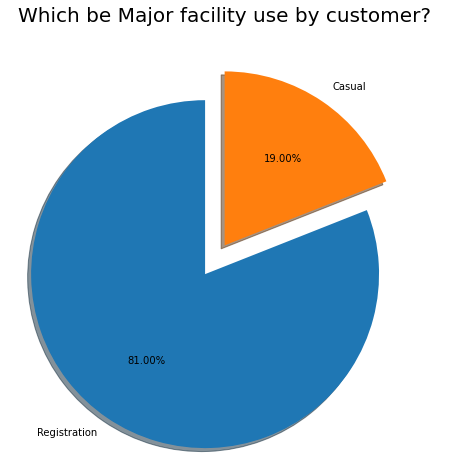

In [11]:
a=pd.DataFrame({int(round(df.casual.sum()/df.cnt.sum(),2)*100),int(round(df.registered.sum()/df.cnt.sum(),2)*100)})
plt.figure(figsize=[8,8])
plt.pie(a.values,autopct="%.2f%%",labels=["Registration","Casual"],explode=[0.2,0],startangle=90,shadow=True);
plt.title("Which be Major facility use by customer?",fontsize=20);

**`inference`**:
- Here we observed that People use registration Facility for sharing bike in 2018-19.
- For people who not register count is less compared to registered count.

In [12]:
def boxplot(var):
    plt.figure(figsize=(15, 2))
    sns.boxplot(x=var,data=df)
    plt.title("Distribution of "+"%s"%var,fontsize=15)
    plt.xlabel(var)

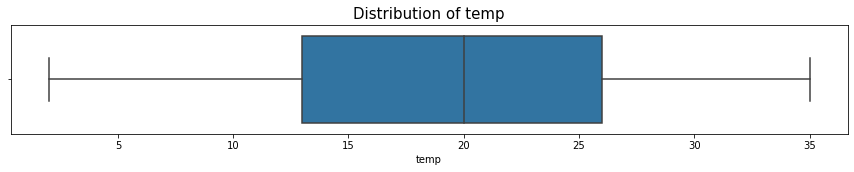

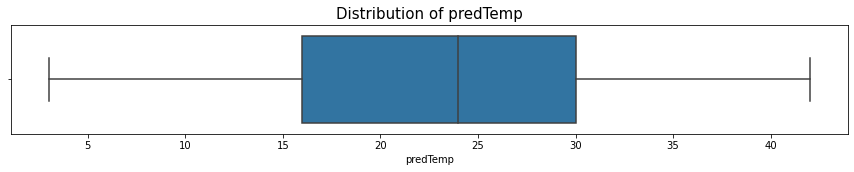

In [13]:
boxplot("temp")
boxplot("predTemp")

**`inference`** :
- Here we Observed that both actual Temprature and predicted temprature by people are uniformaly distributed.
- Where we see median for temp is lower than predicted temprature median.
- Here we see upper whisker for predicted temp is larger than actual temprature

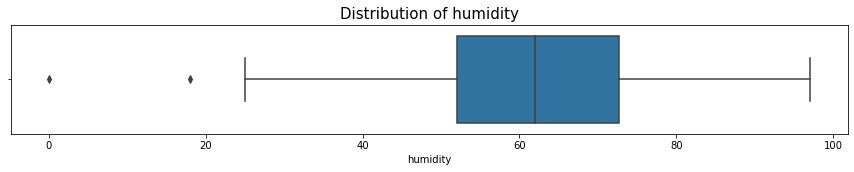

In [14]:
boxplot("humidity")

In [15]:
# Capping a lower outlier
Q1=int(df["humidity"].quantile([0.25]))
Q3=int(df["humidity"].quantile([0.75]))
IQR=Q3-Q1
Lo=Q1-1.5*IQR
df["humidity"]=df["humidity"].apply(lambda x:Lo if x<Lo else x)

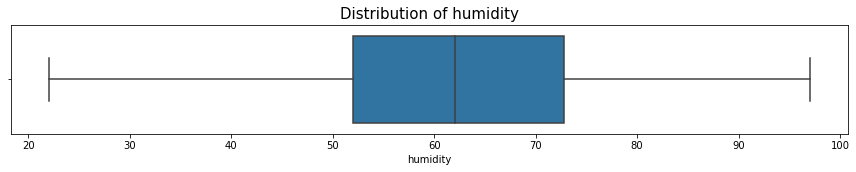

In [16]:
boxplot("humidity")

**`inference`**:
- Here outliers are present below lower whisker so we capping to lower whisker.
- we see recoreded humidity are equally sprede on both side of median of data.
- humidity is consistent

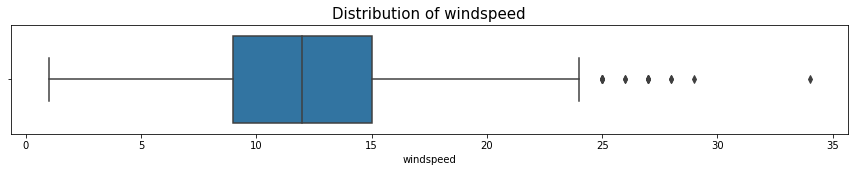

In [17]:
boxplot("windspeed")

In [18]:
# Capping a Upper outlier
Q1=int(df["windspeed"].quantile([0.25]))
Q3=int(df["windspeed"].quantile([0.75]))
IQR=Q3-Q1
hi=Q3+1.5*IQR
df["windspeed"]=df["windspeed"].apply(lambda x:hi if x>hi else x)

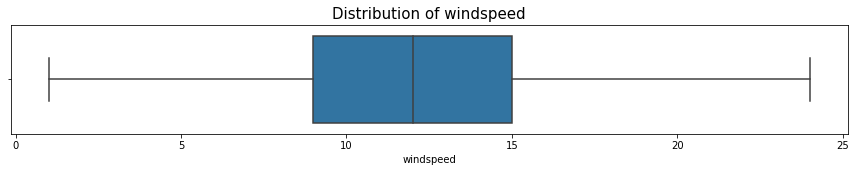

In [19]:
boxplot("windspeed")

**`inference`**:
- Here we see ouliers are present in windspeed data
- Here we see data spread on above median is more than lower whisker.
- Here we observed that more windspeed in range 13 to 25
- here windspeed on one day may be different from other so we kept outlier as it is.

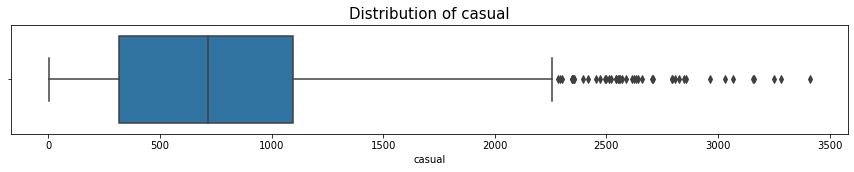

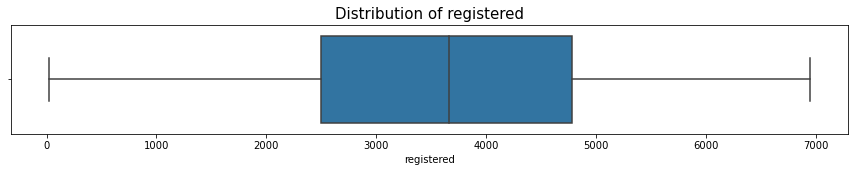

In [20]:
boxplot("casual")
boxplot("registered")

**`Inference`**:
- Here we see registred box plot are symmetric and uniformaly distributed.
- for casual a plot is negitively skewed.
- we also see a highest count of sharing bike for causal customer is upto 3400 and on an average range of count be in between 320 to 1100
- but we see cnt for registred people use sharing bike system on day is higher than casual.

### <font color="blue">6) Bivariate analysis.</font>

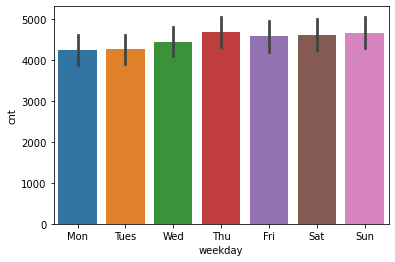

In [21]:
sns.barplot(x="weekday",y="cnt",data=df,estimator=np.mean);

**`inference`**:
- Here we observed that all days of week are people use sharing bikes.
- But for Thu, Fri,Sat,Sun average count is more than Mon,Tues,Wed
- on an average per days count for sharing bike be near 4200.

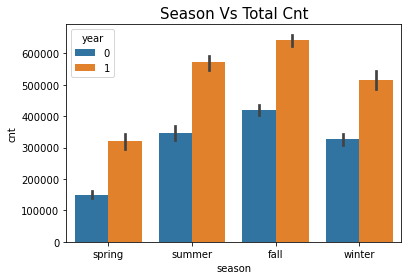

In [22]:
#season vs cnt

sns.barplot(x="season",y="cnt",hue="year",data=df,estimator=sum);
plt.title("Season Vs Total Cnt",fontsize=15);

**`inference`**:
- Maximum count of uses of sharing bikes be on fall season.
- Minimum uses of sharing bikes on spring season 

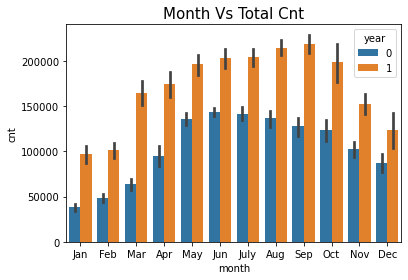

In [23]:
# month vs cnt
sns.barplot(x="month",y="cnt",hue='year',data=df,estimator=sum);
plt.title("Month Vs Total Cnt",fontsize=15);

**`inference` :**
- On month of Aug count of uses of sharing bike be 350000.
- We see Jun,Jul,Aug and Sep are profitable month or use of sharing bike is high compared other month.
- Month of Jan have count be very less than other month.
- Here count be peak at start of summer season(jun,jul,aug) till ends and start of fall season(Sep) also.

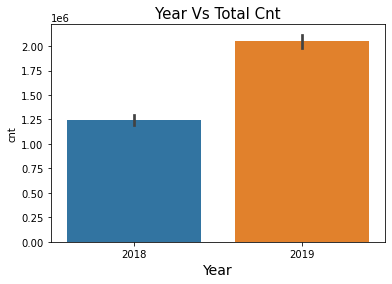

In [24]:
#Years Vs Cnt

sns.barplot(x="year",y="cnt",data=df,estimator=sum);
plt.xticks([0,1],[2018,2019]);
plt.xlabel("Year",fontsize=14);
plt.title("Year Vs Total Cnt",fontsize=15);

**`inference`**:
- Here we see how the people are use and support sharing bike system
- At 2018 count be 12,43,103 and on 2019 count be 20,47,742 so count is increment from 2018 to 19 is 8,04,639 .

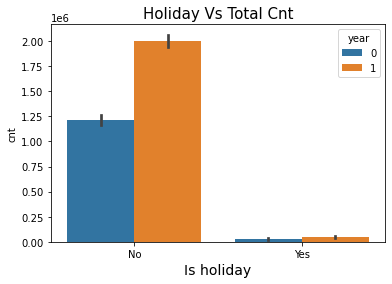

In [25]:
sns.barplot(x="holiday",y="cnt",hue='year',data=df,estimator=sum);
plt.xticks([0,1],["No","Yes"]);
plt.xlabel("Is holiday",fontsize=14);
plt.title("Holiday Vs Total Cnt",fontsize=15);

**`inference`**:
- no of rental sharing bike is more in non-holiday days
- Feature holiday is also effect a count of sharing bikes

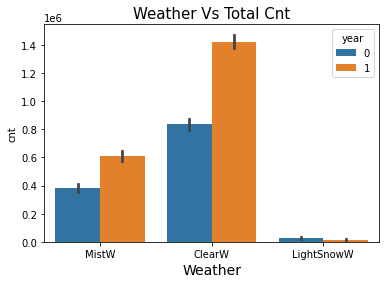

In [26]:
sns.barplot(x="weathersit",y="cnt",hue='year',data=df,estimator=sum);
plt.xlabel("Weather",fontsize=14);
plt.title("Weather Vs Total Cnt",fontsize=15);

**`inference`** :
- We observed that people use sharing bike system mostly on weather is Clear.
- But in weather LightSnow count of sharing bike in 2019 is less than 2018 this will be happended because less data.
- Here Weather also effect on sharing bikes counts.

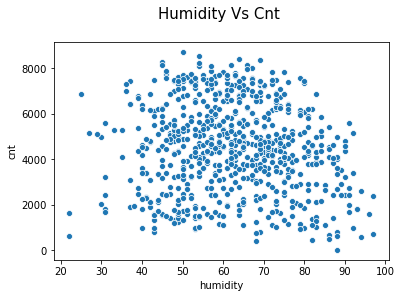

In [27]:
sns.scatterplot("humidity","cnt",data=df,estimator=sum);
plt.title("Humidity Vs Cnt \n",fontsize=15);

**`inference`**:
- Here for humidity less than 40 has make less people to use sharing bikes.
- Where in between 40-90 has seen condensed region where people like to use sharing bikes

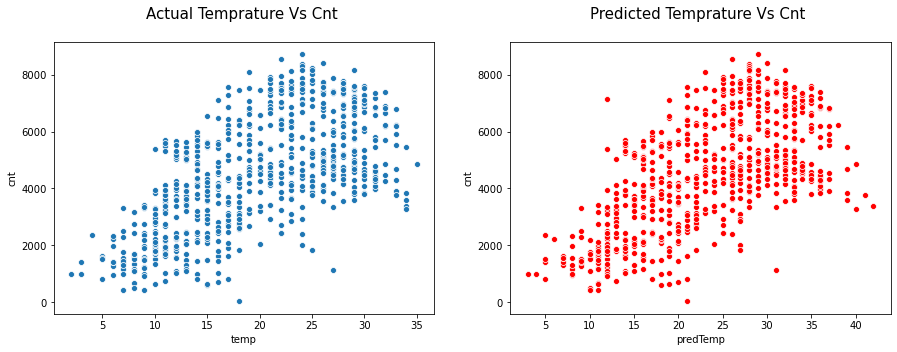

In [28]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.scatterplot("temp","cnt",data=df,estimator=sum);
plt.title("Actual Temprature Vs Cnt \n",fontsize=15);
plt.subplot(1,2,2)
sns.scatterplot("predTemp","cnt",data=df,estimator=sum,color='r');
plt.title("Predicted Temprature Vs Cnt \n",fontsize=15);

**`inference`**
- Here we see actual temprature and predicated temprature nearly similar.
- the range of actual temprature is 2.0 celsius to 35 celsius and for predicted 5.0 celsius to above 40 celsius.
- Also we observed that both plot pattern are linear.
- Its also seen both are hightly corelated with each other.

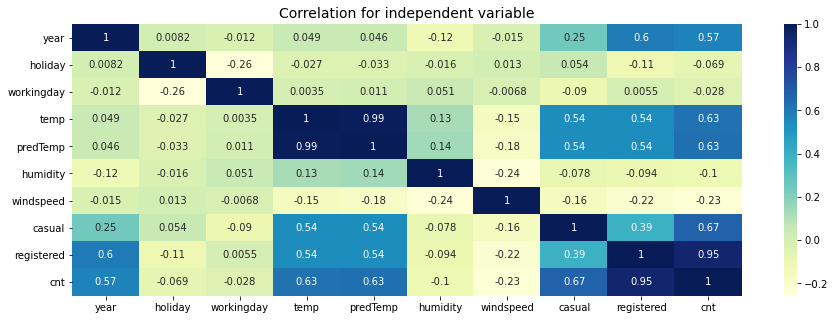

In [29]:
# Corelation matrix
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True);
plt.title("Correlation for independent variable",fontsize=14);

**`inference`**:
- for incresing count of sharing bikes we see temp,yr,predTemp plays important role.
- Here we see mnth is inversly proportional to season.
- Where temp also inversly proportional to season.

# <font color="red">Step 4: Data Preparation(Spliting train-test,scaling etc)</font>

### <font color="blue">1)Looking Data first.</font>

In [30]:
df.head(8)

,season,year,month,holiday,weekday,workingday,weathersit,temp,predTemp,humidity,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,1,MistW,14,18,80.0,10.0,331,654,985
1,spring,0,Jan,0,Tues,1,MistW,14,17,69.0,16.0,131,670,801
2,spring,0,Jan,0,Wed,1,ClearW,8,9,43.0,16.0,120,1229,1349
3,spring,0,Jan,0,Thu,1,ClearW,8,10,59.0,10.0,108,1454,1562
4,spring,0,Jan,0,Fri,1,ClearW,9,11,43.0,12.0,82,1518,1600
5,spring,0,Jan,0,Sat,0,ClearW,8,11,51.0,6.0,88,1518,1606
6,spring,0,Jan,0,Sun,0,MistW,8,10,49.0,11.0,148,1362,1510
7,spring,0,Jan,0,Mon,1,MistW,6,8,53.0,17.0,68,891,959


### <font color="blue">2) Creating Dummy variable for categorical col.</font>

In [31]:
#Now create a dummy variable for season,month,weathersit
season=pd.get_dummies(df.season,drop_first=True)
mon=pd.get_dummies(df.month,drop_first=True)
weather=pd.get_dummies(df.weathersit,drop_first=True)
day=pd.get_dummies(df.weekday,drop_first=True)
df=pd.concat([df,season,mon,weather,day],axis=1)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,predTemp,humidity,...,Oct,Sep,LightSnowW,MistW,Mon,Sat,Sun,Thu,Tues,Wed
0,spring,0,Jan,0,Mon,1,MistW,14,18,80.0,...,0,0,0,1,1,0,0,0,0,0
1,spring,0,Jan,0,Tues,1,MistW,14,17,69.0,...,0,0,0,1,0,0,0,0,1,0
2,spring,0,Jan,0,Wed,1,ClearW,8,9,43.0,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thu,1,ClearW,8,10,59.0,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,ClearW,9,11,43.0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#Remove unwanted and categorical columns from data.
df.drop(["season","month","weekday","weathersit","casual","registered"],axis=1,inplace=True)

In [33]:
df.head()

,year,holiday,workingday,temp,predTemp,humidity,windspeed,cnt,spring,summer,...,Oct,Sep,LightSnowW,MistW,Mon,Sat,Sun,Thu,Tues,Wed
0,0,0,1,14,18,80.0,10.0,985,1,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,1,14,17,69.0,16.0,801,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8,9,43.0,16.0,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8,10,59.0,10.0,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9,11,43.0,12.0,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


### <font color="blue">3) Spliting into Train and test .</font>

In [34]:
#Spliting test and test datatsets.
#Here no of rows are very less so we split into 70% and 30%
X_df,y_df=train_test_split(df,train_size=0.7,random_state=100)

### <font color="blue">4)Checking shape and size of test and train</font>

In [35]:
print("Shape of train: ",X_df.shape)
print("Shape of test:" ,y_df.shape)

Shape of train:  (510, 30)
Shape of test: (220, 30)


# <font color="red">Step 5: Modeling</font>

## <font color="brown">Step 5a :Modeling Train Data.</font>

### <font color="blue">1) MinMaxScaler() for scalling numerical col.</font>

In [36]:
#group which columns are countinous numeric for scalling
col_nam=["temp","predTemp","humidity","windspeed","cnt"]
scale=MinMaxScaler()
X_df[col_nam]=scale.fit_transform(X_df[col_nam])
X_df.describe()

,year,holiday,workingday,temp,predTemp,humidity,windspeed,cnt,spring,summer,...,Oct,Sep,LightSnowW,MistW,Mon,Sat,Sun,Thu,Tues,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.533571,0.512217,0.542614,0.466043,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.029412,0.345098,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225145,0.207737,0.186219,0.230759,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.169124,0.475867,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333333,0.333333,0.400000,0.318182,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545455,0.538462,0.546667,0.454545,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727273,0.692308,0.680000,0.590909,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### <font color="blue">2) Extraction of feature and Target col</font>

In [37]:
#Target(dependent)
y_train=X_df.pop("cnt")
#Feature(independent)
X_train=X_df

### <font color="blue">3)Feature Selection with Balanced Approch.</font>

- For modelling we use **`balanced approch (automatic+mannual selection)`**
- First we take top 15 feature by using `Recursive Feature Elimination` technique.
- Then we go for mannual selection with some assumption.
    - p-value is significant(p<0.05)
    - vif value is less than 5

In [38]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [39]:
#Supported columns
col = X_train.columns[rfe.support_]
col=list(col)

In [40]:
#Unsupported Col
Ucol=list(X_train.columns[~rfe.support_])

In [41]:
#dropping usupported col from X_train
X_train.drop(Ucol,axis=1,inplace=True)

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [43]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [44]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [45]:
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     174.7
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.21e-186
Time:                        14:46:36   Log-Likelihood:                 508.37
No. Observations:                 510   AIC:                            -984.7
Df Residuals:                     494   BIC:                            -917.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3333      0.028     11.780      0.000       0.278       0.389
year           0.2308      0.008     28.204      0.000       0.215       0.247
holiday       -0.0886      0.026     -3.417      0.001      -0.140      -0.038
temp           0.3054      0.122      2.496      0.013       0.065       0.546
predTemp       0.1425      0.132      1.083      0.279      -0.116       0.401
humidity      -0.1206      0.030     -3.970      0.000      -0.180      -0.061
windspeed     -0.1243      0.019     -6.419      0.000      -0.162      -0.086
spring        -0.1039      0.016     -6.701      0.000      -0.134      -0.073
winter         0.0680      0.014      4.747      0.000       0.040       0.096
Dec           -0.0425      0.017     -2.433      0.015      -0.077      -0.008
Jan           -0.0496      0.018     -2.729      0.007      -0.085      -0.014
July          -0.0713      0.017     -4.112      0.000      -0.105      -0.037
Nov           -0.0462      0.019     -2.462      0.014      -0.083      -0.009
Sep            0.0574      0.016      3.669      0.000       0.027       0.088
LightSnowW    -0.2469      0.027     -9.088      0.000      -0.300      -0.194
MistW         -0.0548      0.011     -5.124      0.000      -0.076      -0.034
==============================================================================
Omnibus:                       69.503   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.024
Skew:                          -0.695   Prob(JB):                     9.86e-39
Kurtosis:                       5.510   Cond. No.                         72.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**`Inference`**:
- Here preTemp has more p-value than other then we drop it.

In [46]:
X_train.drop("predTemp",axis=1,inplace=True)

In [47]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train,X_train_lm).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     187.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.84e-187
Time:                        14:46:37   Log-Likelihood:                 507.77
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     495   BIC:                            -922.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3390      0.028     12.187      0.000       0.284       0.394
year           0.2306      0.008     28.185      0.000       0.215       0.247
holiday       -0.0897      0.026     -3.463      0.001      -0.141      -0.039
temp           0.4330      0.033     12.971      0.000       0.367       0.499
humidity      -0.1182      0.030     -3.900      0.000      -0.178      -0.059
windspeed     -0.1277      0.019     -6.686      0.000      -0.165      -0.090
spring        -0.1040      0.016     -6.710      0.000      -0.135      -0.074
winter         0.0689      0.014      4.813      0.000       0.041       0.097
Dec           -0.0433      0.017     -2.486      0.013      -0.078      -0.009
Jan           -0.0512      0.018     -2.824      0.005      -0.087      -0.016
July          -0.0709      0.017     -4.089      0.000      -0.105      -0.037
Nov           -0.0466      0.019     -2.482      0.013      -0.083      -0.010
Sep            0.0573      0.016      3.662      0.000       0.027       0.088
LightSnowW    -0.2497      0.027     -9.228      0.000      -0.303      -0.197
MistW         -0.0553      0.011     -5.181      0.000      -0.076      -0.034
==============================================================================
Omnibus:                       68.405   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.813
Skew:                          -0.682   Prob(JB):                     1.81e-38
Kurtosis:                       5.514   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**`inference`**:
- Here we see Dec and Nov has same p-value 0.013 so we 1st drop Dec.

In [48]:
# After look p-value is significance checking VIF
X_train_new = X_train_lm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,15.59
2,temp,12.66
4,windspeed,4.36
6,winter,2.85
5,spring,2.66
13,MistW,2.41
0,year,2.08
10,Nov,1.83
8,Jan,1.70
7,Dec,1.52


In [49]:
X_train.drop("Dec",axis=1,inplace=True)
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train)
lm3 = sm.OLS(y_train,X_train_lm).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          4.20e-187
Time:                        14:46:37   Log-Likelihood:                 504.60
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     496   BIC:                            -921.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3247      0.027     11.869      0.000       0.271       0.378
year           0.2305      0.008     28.018      0.000       0.214       0.247
holiday       -0.0908      0.026     -3.487      0.001      -0.142      -0.040
temp           0.4557      0.032     14.119      0.000       0.392       0.519
humidity      -0.1245      0.030     -4.102      0.000      -0.184      -0.065
windspeed     -0.1242      0.019     -6.485      0.000      -0.162      -0.087
spring        -0.1043      0.016     -6.690      0.000      -0.135      -0.074
winter         0.0578      0.014      4.227      0.000       0.031       0.085
Jan           -0.0407      0.018     -2.294      0.022      -0.075      -0.006
July          -0.0746      0.017     -4.300      0.000      -0.109      -0.041
Nov           -0.0290      0.017     -1.661      0.097      -0.063       0.005
Sep            0.0601      0.016      3.831      0.000       0.029       0.091
LightSnowW    -0.2427      0.027     -8.972      0.000      -0.296      -0.190
MistW         -0.0536      0.011     -5.002      0.000      -0.075      -0.033
==============================================================================
Omnibus:                       60.644   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.567
Skew:                          -0.627   Prob(JB):                     4.05e-32
Kurtosis:                       5.287   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
X_train.drop("Nov",axis=1,inplace=True)
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train)
lm4 = sm.OLS(y_train,X_train_lm).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.10e-187
Time:                        14:46:37   Log-Likelihood:                 503.19
No. Observations:                 510   AIC:                            -980.4
Df Residuals:                     497   BIC:                            -925.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.027     11.741      0.000       0.267       0.374
year           0.2304      0.008     27.966      0.000       0.214       0.247
holiday       -0.0961      0.026     -3.711      0.000      -0.147      -0.045
temp           0.4613      0.032     14.346      0.000       0.398       0.524
humidity      -0.1224      0.030     -4.030      0.000      -0.182      -0.063
windspeed     -0.1255      0.019     -6.546      0.000      -0.163      -0.088
spring        -0.1017      0.016     -6.547      0.000      -0.132      -0.071
winter         0.0490      0.013      3.880      0.000       0.024       0.074
Jan           -0.0401      0.018     -2.260      0.024      -0.075      -0.005
July          -0.0755      0.017     -4.342      0.000      -0.110      -0.041
Sep            0.0620      0.016      3.956      0.000       0.031       0.093
LightSnowW    -0.2416      0.027     -8.917      0.000      -0.295      -0.188
MistW         -0.0534      0.011     -4.979      0.000      -0.074      -0.032
==============================================================================
Omnibus:                       57.852   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.227
Skew:                          -0.606   Prob(JB):                     4.32e-30
Kurtosis:                       5.213   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# After look p-value is significance checking VIF
X_train_new = X_train_lm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,15.04
2,temp,12.19
4,windspeed,4.30
5,spring,2.60
11,MistW,2.39
0,year,2.08
6,winter,1.87
7,Jan,1.64
8,July,1.40
10,LightSnowW,1.28


In [52]:
X_train.drop("Jan",axis=1,inplace=True)
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train)
lm5 = sm.OLS(y_train,X_train_lm).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.90e-188
Time:                        14:46:38   Log-Likelihood:                 500.58
No. Observations:                 510   AIC:                            -977.2
Df Residuals:                     498   BIC:                            -926.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3086      0.027     11.475      0.000       0.256       0.361
year           0.2296      0.008     27.780      0.000       0.213       0.246
holiday       -0.0970      0.026     -3.729      0.000      -0.148      -0.046
temp           0.4790      0.031     15.294      0.000       0.417       0.540
humidity      -0.1259      0.030     -4.133      0.000      -0.186      -0.066
windspeed     -0.1203      0.019     -6.294      0.000      -0.158      -0.083
spring        -0.1105      0.015     -7.315      0.000      -0.140      -0.081
winter         0.0530      0.013      4.227      0.000       0.028       0.078
July          -0.0789      0.017     -4.540      0.000      -0.113      -0.045
Sep            0.0612      0.016      3.890      0.000       0.030       0.092
LightSnowW    -0.2392      0.027     -8.799      0.000      -0.293      -0.186
MistW         -0.0536      0.011     -4.979      0.000      -0.075      -0.032
==============================================================================
Omnibus:                       56.059   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.465
Skew:                          -0.584   Prob(JB):                     1.72e-29
Kurtosis:                       5.207   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**`inference`**:
- Here we see all variable have coefficent is significant to dependent variable now checking how those variable co-related with other independent variable.

In [53]:
# After look p-value is significance checking VIF
X_train_new = X_train_lm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,14.70
2,temp,11.87
4,windspeed,4.30
10,MistW,2.39
5,spring,2.15
0,year,2.07
6,winter,1.87
7,July,1.39
9,LightSnowW,1.28
8,Sep,1.20


**`inference`**:
- Now here we fount humidity has high correlation with other so we drop humidity.

In [54]:
X_train.drop("humidity",axis=1,inplace=True)
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train)
lm6 = sm.OLS(y_train,X_train_lm).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     245.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.39e-185
Time:                        14:46:38   Log-Likelihood:                 491.98
No. Observations:                 510   AIC:                            -962.0
Df Residuals:                     499   BIC:                            -915.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2582      0.024     10.602      0.000       0.210       0.306
year           0.2337      0.008     28.020      0.000       0.217       0.250
holiday       -0.0977      0.026     -3.699      0.000      -0.150      -0.046
temp           0.4474      0.031     14.499      0.000       0.387       0.508
windspeed     -0.0979      0.019     -5.257      0.000      -0.134      -0.061
spring        -0.1148      0.015     -7.500      0.000      -0.145      -0.085
winter         0.0431      0.013      3.446      0.001       0.019       0.068
July          -0.0714      0.018     -4.065      0.000      -0.106      -0.037
Sep            0.0578      0.016      3.619      0.000       0.026       0.089
LightSnowW    -0.2864      0.025    -11.429      0.000      -0.336      -0.237
MistW         -0.0797      0.009     -8.987      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       58.738   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.034
Skew:                          -0.613   Prob(JB):                     1.06e-30
Kurtosis:                       5.235   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# After look p-value is significance checking VIF
X_train_new = X_train_lm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.78
3,windspeed,4.29
0,year,2.06
4,spring,1.66
9,MistW,1.52
5,winter,1.40
6,July,1.35
7,Sep,1.20
8,LightSnowW,1.08
1,holiday,1.04


**`Final Inference`**:
- Now all coeffient for independent variable are significant.
- with all independent variable has correlation with other variable also less than 5.
- r2 value be 0.83

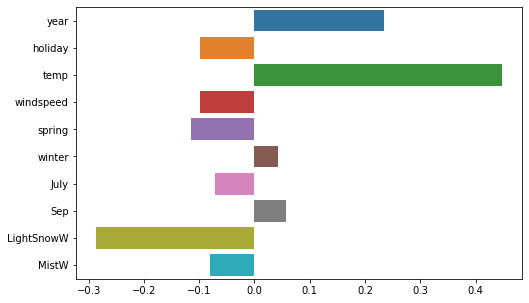

In [56]:
features=X_train.columns
plt.figure(figsize=(8,5))
sns.barplot(lm6.params.values[1:],features);

**`inference`**:
- here we see year, temp, Lighsnow,spring are plays important role in demand of sharing bikes.

### <font color="blue">4)Analysis(Residual).</font>

In [57]:
y_train_pred=lm6.predict(X_train_lm)

In [58]:
RSE=y_train-y_train_pred

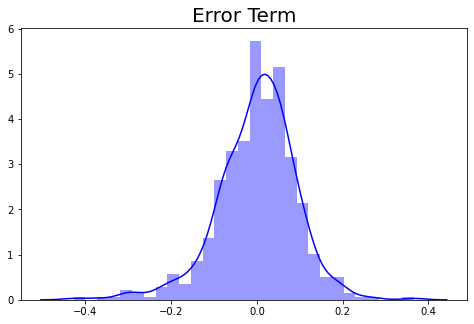

In [59]:
#Rule 1:Error Term should be normally distributed
#Rule 2:Error Term are centered around to 0
plt.figure(figsize=(8,5))
sns.distplot(RSE,color="b");
plt.title("Error Term",fontsize=20);

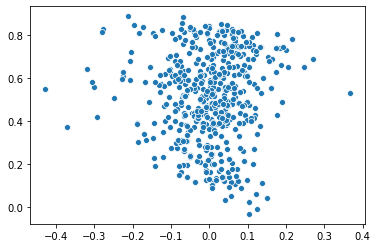

In [60]:
#Rule 3:Error therm independent to each other
sns.scatterplot(RSE,y_train_pred);

**`inference`**:
- Here we observed error term are scatterd around 0.

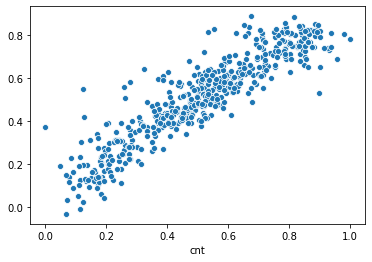

In [61]:
#Rule 4:Required equal varience.(homocedacity)
sns.scatterplot(y_train,y_train_pred);

**`inference`**:
- Here we observed no cone like shape.

## <font color="brown">Step 5b: Modeling Test Data</font>

In [62]:
col_test=["temp","predTemp","humidity","windspeed","cnt"]
y_df[col_test]=scale.transform(y_df[col_test])
y_df.describe()

,year,holiday,workingday,temp,predTemp,humidity,windspeed,cnt,spring,summer,...,Oct,Sep,LightSnowW,MistW,Mon,Sat,Sun,Thu,Tues,Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.553857,0.532634,0.526182,0.457645,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.027273,0.318182,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,0.232754,0.212565,0.192281,0.221406,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.163248,0.466833,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,0.030303,0.025641,0.040000,-0.045455,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.363636,0.358974,0.383333,0.318182,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545455,0.538462,0.506667,0.454545,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757576,0.717949,0.666667,0.590909,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.969697,0.974359,1.000000,1.000000,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
#Dividing data into y_test and X_test
y_test=y_df.pop("cnt")
X_test=y_df

In [64]:
col=[]
for i in X_test.columns:
    if i not in X_train.columns:
        col.append(i)  

In [65]:
X_test.drop(col,axis=1,inplace=True)

In [66]:
# Adding constant variable to test dataframe
X_test_sm= sm.add_constant(X_test)

In [67]:
#prediction on Test set
y_test_pred=lm6.predict(X_test_sm)

In [68]:
#Evaluating accuracy score for train and test
print("r2 score for train",round(r2_score(y_train,y_train_pred),2))
print("r2 score for test",round(r2_score(y_test,y_test_pred),2))

r2 score for train 0.83
r2 score for test 0.81


## <font color="red">Step 6: Model Evaluation</font>

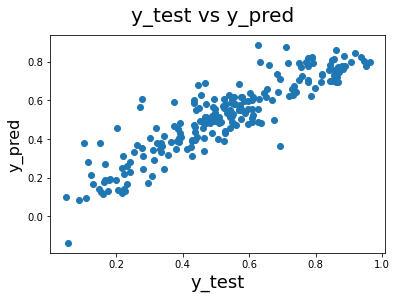

In [69]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  ;

### Checking How a train model evalute for random sample data from dataset

In [70]:
for i in range(100,len(df),100):
    sample=df.sample(i)
    col_boot=["temp","predTemp","humidity","windspeed","cnt"]
    sample[col_boot]=scale.transform(sample[col_boot])
    sample.describe()

    #Dividing data into y_test and X_test
    y_test_sample=sample.pop("cnt")
    X_test_sample=sample

    X_test_sm_sample= sm.add_constant(X_test_sample)

    X_test_sm_sample=X_test_sm_sample.drop(col,axis=1)

    y_test_pred_sample=lm6.predict(X_test_sm_sample)

    print("r2 score for sample of ",i,":",round(r2_score(y_test_sample,y_test_pred_sample),2))

r2 score for sample of  100 : 0.9
r2 score for sample of  200 : 0.83
r2 score for sample of  300 : 0.81
r2 score for sample of  400 : 0.82
r2 score for sample of  500 : 0.82
r2 score for sample of  600 : 0.83
r2 score for sample of  700 : 0.82


# <font color="red">conclusion.</font>

- **In Exploratory Data analysis we see from 2018-19 the Season,Month,holiday,weekday etc are effective on inceresing demand of sharing bike.**

- **But in Analysis we found year also increse count of demand of sharing bike and its obvious as year change need also changes.**

- **Temprature also plays important role to incerase demand of sharing bike.**

- **with season winter and and month September effective to increase demand of sharing bike.**

- **No Holidays(Working Days) are incresing demand of sharing bike.**

- **No Spring,No LightSnowW and No MistW will increase demand of sharing bike .**